In [17]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [18]:
df = pd.read_csv('winequality-red.csv',index_col=0)
df.shape
df.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


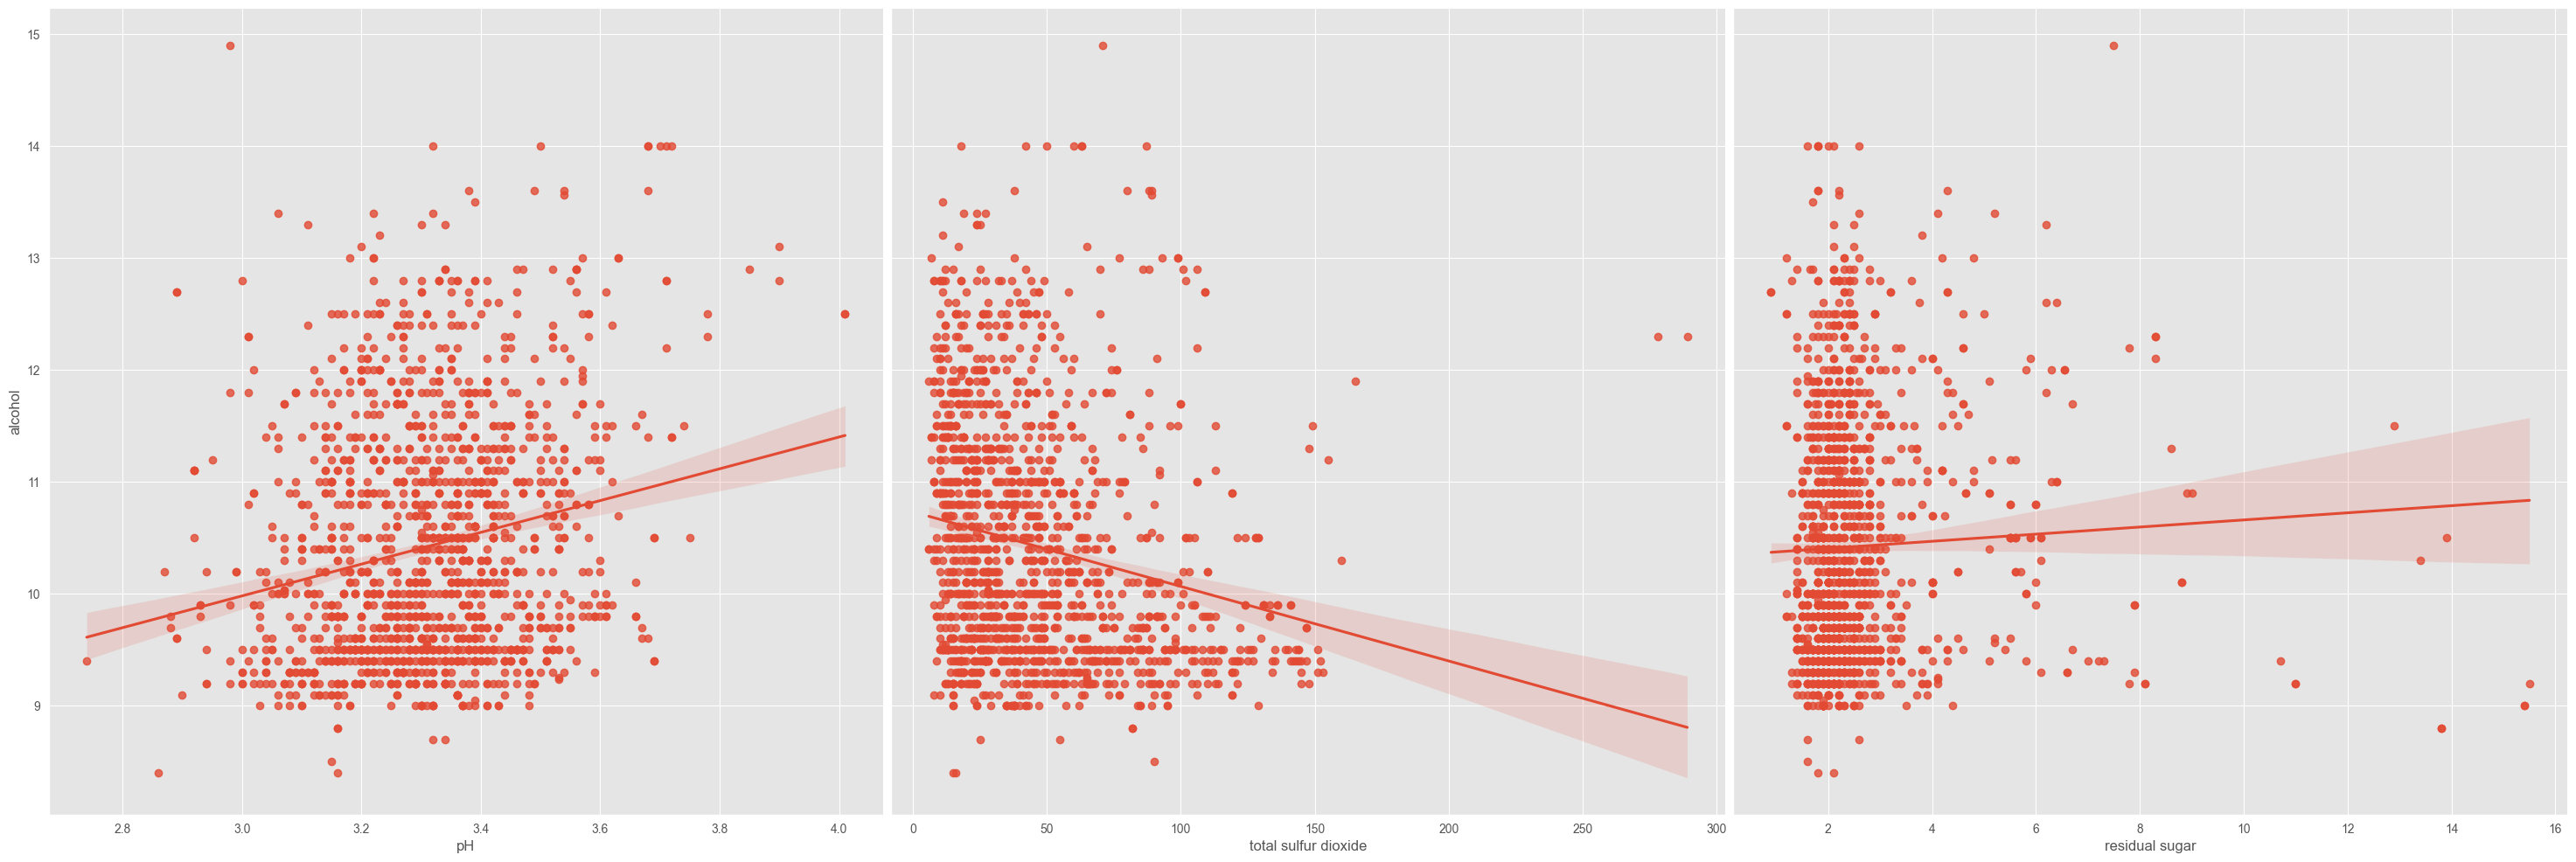

In [19]:
sns.pairplot(
    df,
    y_vars='alcohol',
    x_vars=['pH','total sulfur dioxide','residual sugar'],
    height=10,
    kind='reg',
    diag_kind=None
);

In [20]:
import statsmodels.formula.api as smf
model = smf.ols('alcohol ~ pH', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     70.51
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           9.96e-17
Time:                        23:10:22   Log-Likelihood:                -2335.5
No. Observations:                1599   AIC:                             4675.
Df Residuals:                    1597   BIC:                             4686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7232      0.560     10.214      0.000       4.624       6.822
pH             1.4194      0.169      8.397      0.000       1.088       1.751
==============================================================================
Omnibus:                      148.271   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.003
Skew:                           0.838   Prob(JB):                     5.51e-42
Kurtosis:                       3.202   Cond. No.                         77.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
res.params

Intercept    5.723194
pH           1.419398
dtype: float64

Парная регрессия в логарифмах

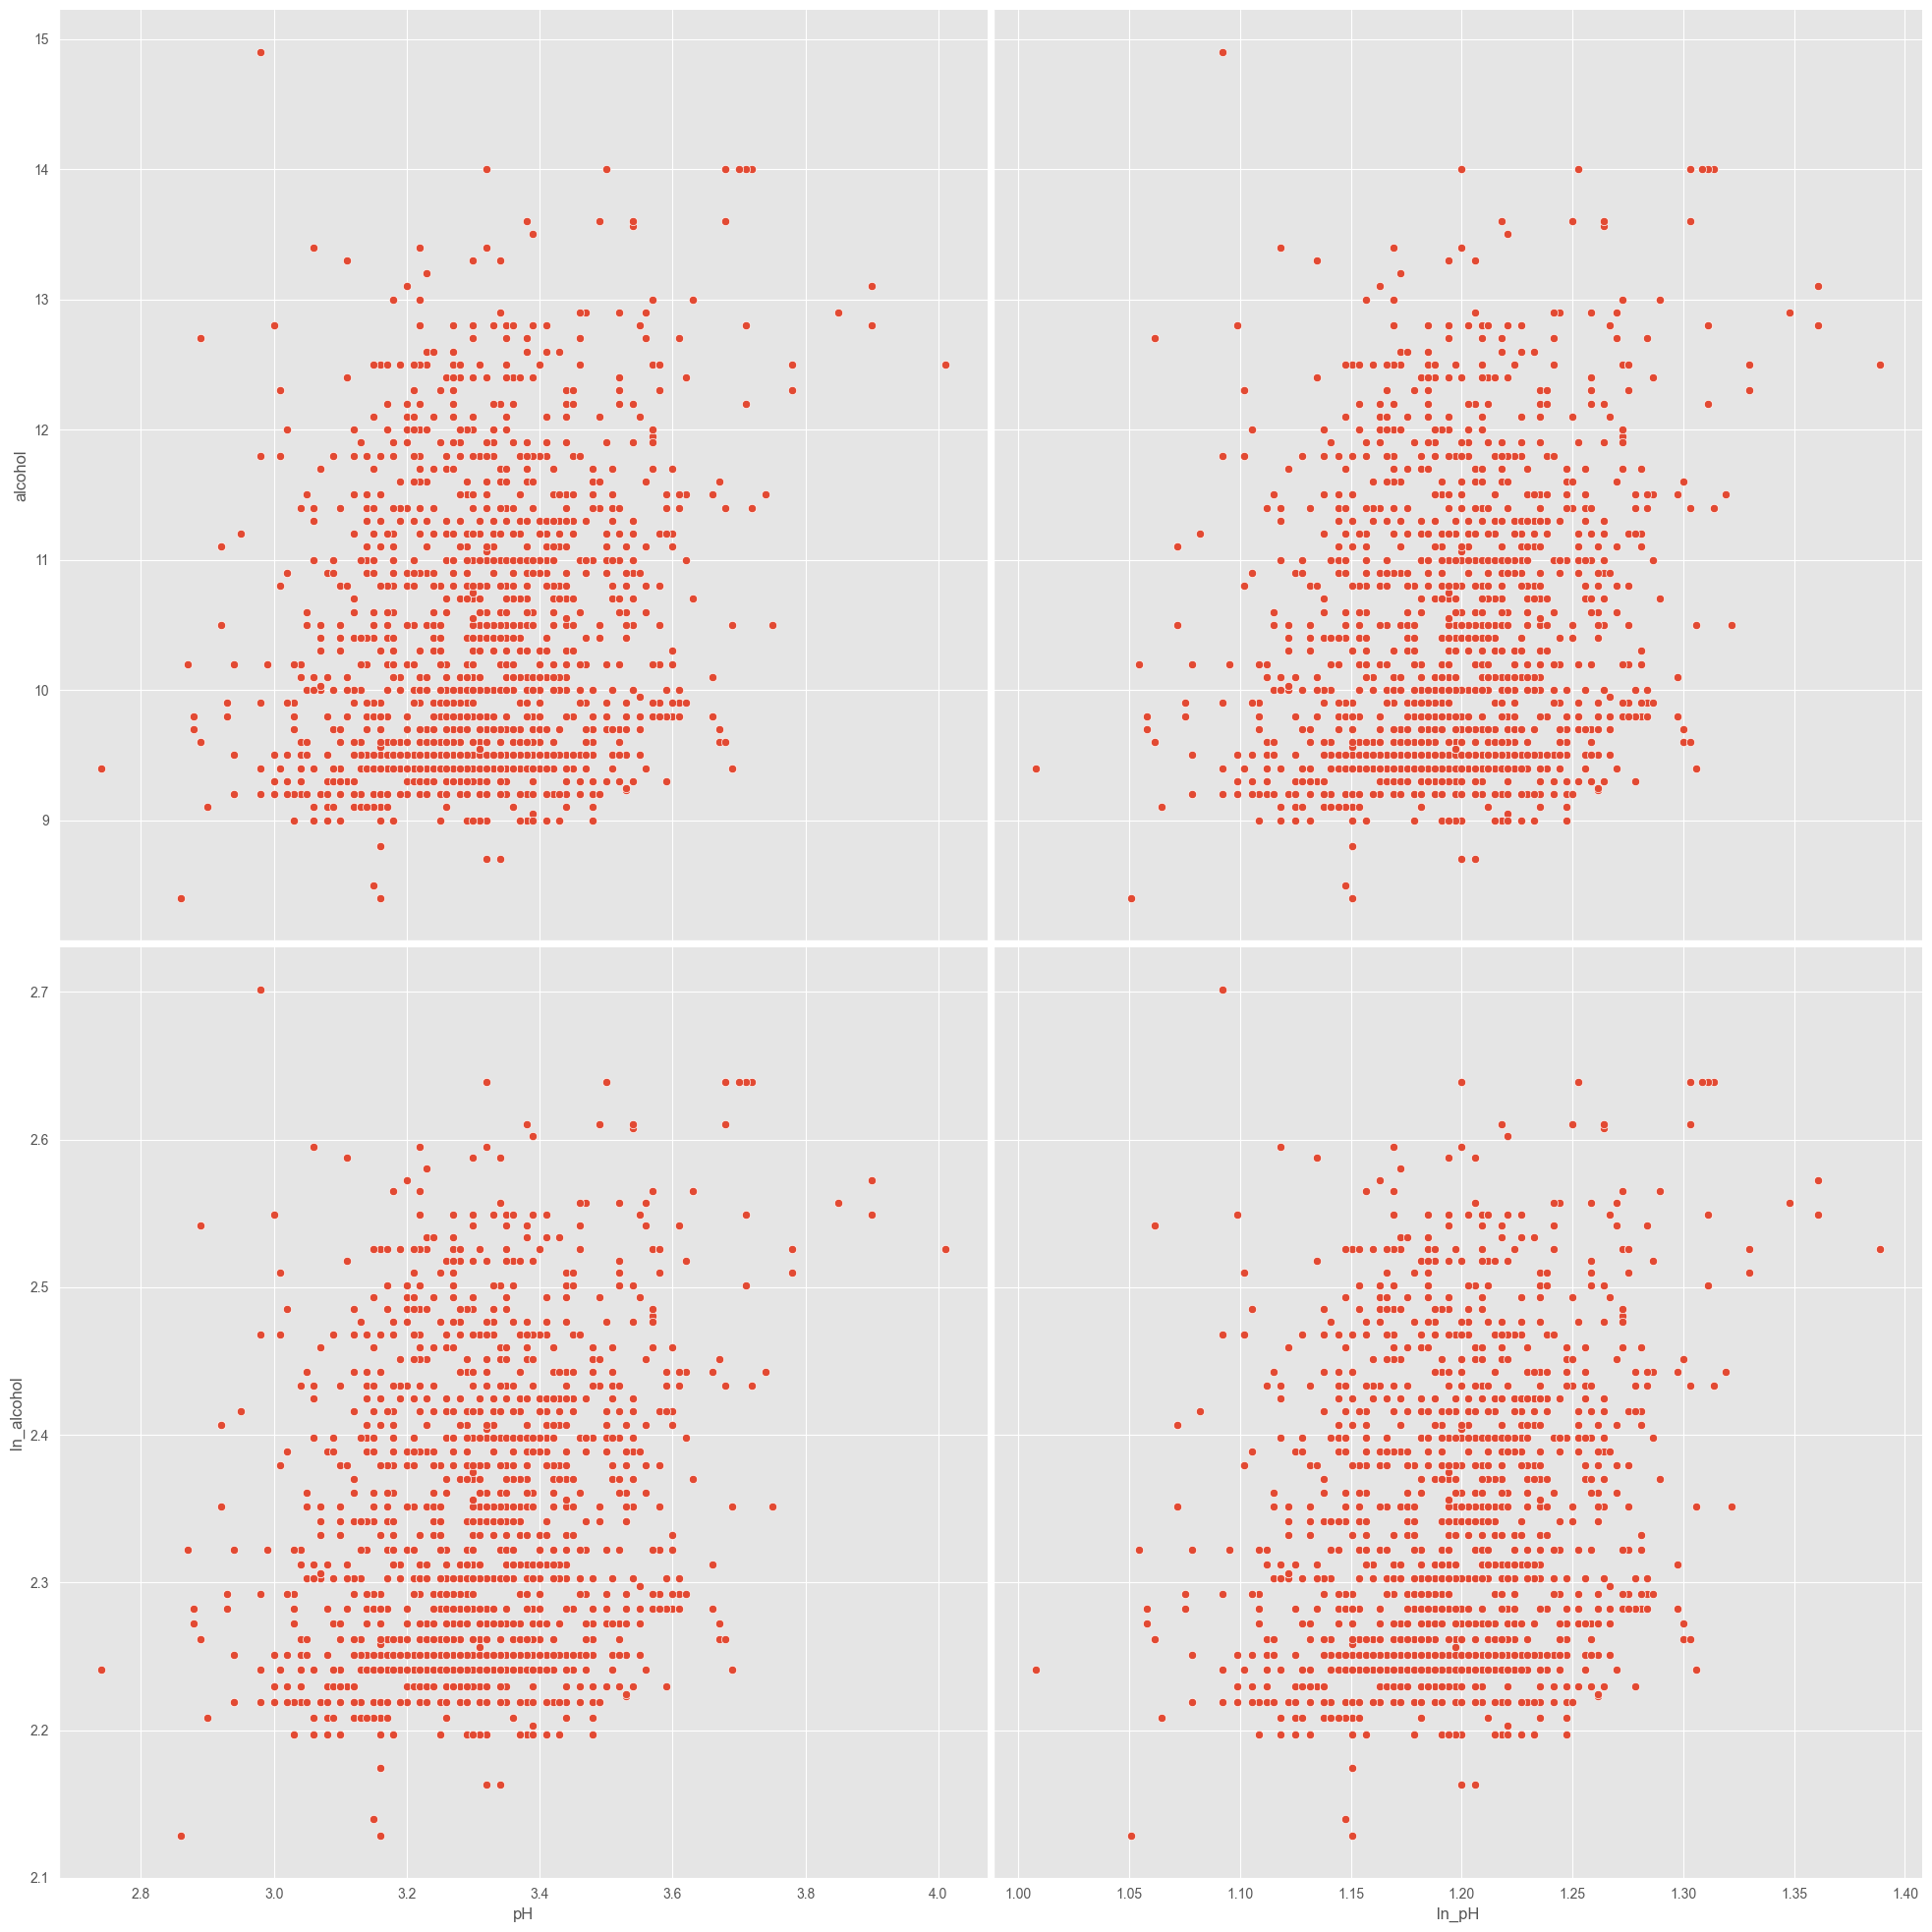

In [22]:
df['ln_alcohol'] = df['alcohol'].apply(np.log)
df['ln_pH'] = df['pH'].apply(np.log)
sns.pairplot(
    df,
    y_vars=['alcohol','ln_alcohol'],
    x_vars=['pH','ln_pH'],
    height=10,
    diag_kind=None
);

Очистим данные от выбросов

In [23]:
df = df[df.alcohol > df.alcohol.quantile(0.01)]

In [24]:
import statsmodels.formula.api as smf
model = smf.ols('ln_alcohol ~ ln_pH', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_alcohol   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     63.03
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           3.86e-15
Time:                        23:10:23   Log-Likelihood:                 1455.3
No. Observations:                1562   AIC:                            -2907.
Df Residuals:                    1560   BIC:                            -2896.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8508      0.062     29.857      0.000       1.729       1.972
ln_pH          0.4110      0.052      7.939      0.000       0.309       0.513
==============================================================================
Omnibus:                      106.629   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.818
Skew:                           0.679   Prob(JB):                     7.87e-28
Kurtosis:                       2.732   Cond. No.                         52.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""